In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.read_csv(r"C:\Users\Jurgen\Desktop\PDS-Assignment-1\Assignment 2\After Cleansing\Merged.csv")
merged = merged[merged.year >= 2000]
# merged

In [25]:
NUS = merged[["year", "sex","nus", "total", "type"]]
NUS

,year,sex,nus,total,type
54,2000,F,11341,20023,enroll
55,2000,MF,21233,39193,enroll
56,2000,M,9892,19170,enroll
57,2001,F,11781,21156,enroll
58,2001,MF,22172,41078,enroll
...,...,...,...,...,...
292,2013,F,3350,9577,graduate
293,2013,MF,6446,17952,graduate
294,2014,M,3094,8773,graduate
295,2014,MF,6700,18420,graduate


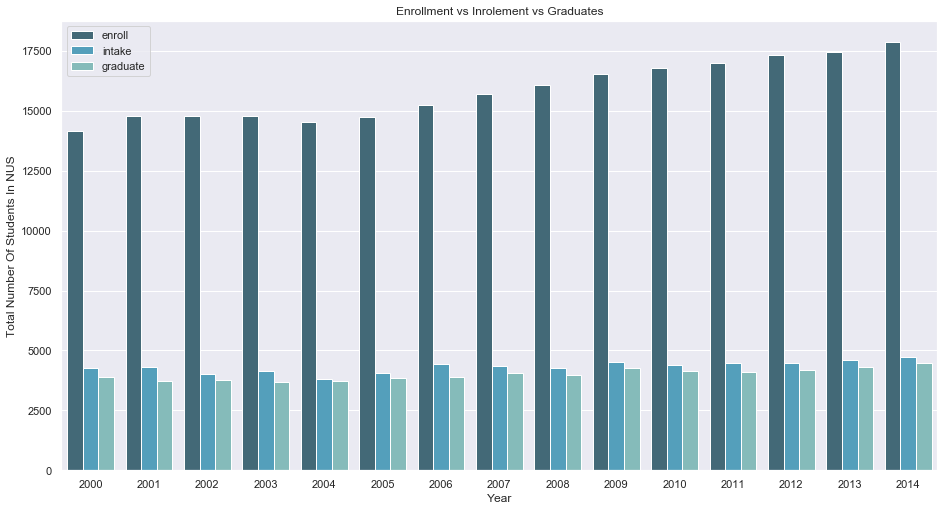

In [27]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
barplot = sns.barplot(x="year", y="nus", hue= "type", data=NUS, palette="GnBu_d", ci=None)


barplot.set(xlabel='Year', ylabel='Total Number Of Students In NUS', title="Enrollment vs Inrolement vs Graduates")
plt.legend(loc='upper left')
plt.show(barplot)

In [85]:
intake_grad = NUS[NUS.type !="enroll"]
intake_grad = intake_grad[intake_grad.sex != "MF"].sort_values("year").reset_index(drop = True)
intake_grad

,year,sex,nus,total,type
0,2000,F,3437,7326,intake
1,2000,F,3161,6601,graduate
2,2000,M,2697,5553,graduate
3,2000,M,2984,6092,intake
4,2001,F,3534,7377,intake
5,2001,M,2524,5380,graduate
6,2001,F,3051,6671,graduate
7,2001,M,2945,5869,intake
8,2002,M,2767,5999,intake
9,2002,F,3252,7390,intake


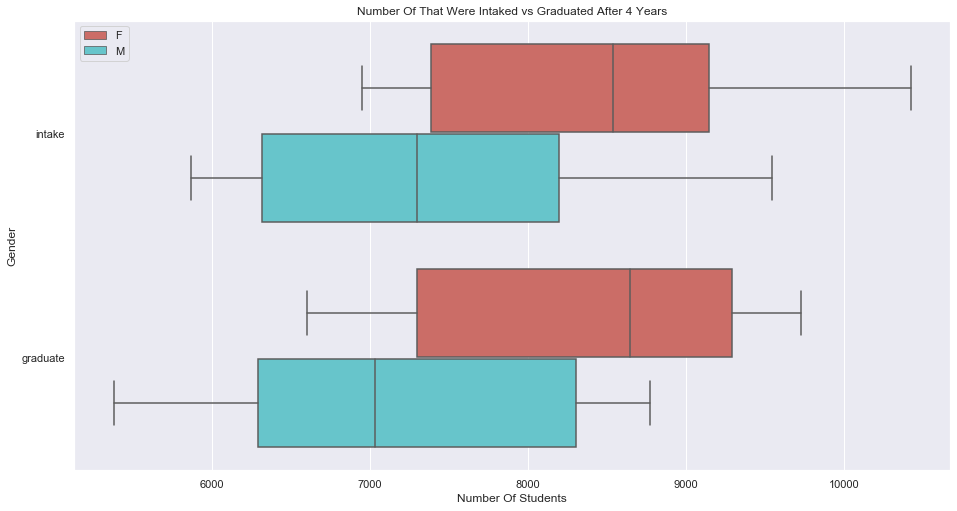

In [73]:
#Look at the past events in the 14 years
boxplot = sns.boxplot(x="total", y="type", hue = "sex", palette = "hls", data=intake_grad)


plt.legend(loc='upper left')
boxplot.set(xlabel='Number Of Students', ylabel='Gender', title="Number Of That Were Intaked vs Graduated After 4 Years")
plt.show(boxplot)


In [75]:
medians = intake_grad.groupby(['type',"sex"])["total"].median()
print(medians)

type      sex
graduate  F      8649
          M      7031
intake    F      8538
          M      7299
Name: total, dtype: int64


In [89]:
import plotly.express as px
fig = px.box(intake_grad, x="type", y="total", color="sex",
             notched = True, # used notched shape
             title="Box plot of total bill") 
fig.show()

In [22]:
firstgrad = pd.read_csv(r"C:\Users\Jurgen\Desktop\PDS-Assignment-1\Assignment 2\Raw Data\graduates-from-university-first-degree-courses-by-type-of-course.csv",
                       na_values = "na")
firstgrad = firstgrad[firstgrad.year >= 2000].reset_index(drop = True).set_index(["year", "type_of_course"])
# firstgrad = firstgrad[firstgrad.type_of_course.isin(["Engineering Sciences", 
#                                                      "Humanities & Social Sciences", 
#                                                      "Natural, Physical & Mathematical Sciences"])].reset_index(drop = True).set_index(["year", "type_of_course"])
firstgrad.no_of_graduates = firstgrad.no_of_graduates.fillna(0).astype(int)
firstgrad

sex  no_of_graduates
year type_of_course                                        
2000 Education                       Males               35
     Applied Arts                    Males                0
     Humanities & Social Sciences    Males              574
     Mass Communication              Males               34
     Accountancy                     Males              250
...                                    ...              ...
2014 Health Sciences               Females              309
     Information Technology        Females              289
     Architecture & Building       Females              258
     Engineering Sciences          Females             1251
     Services                      Females              219

[450 rows x 2 columns]

In [ ]:

firstgrad["total"] = firstgrad.no_of_graduates.groupby(level=["year", "type_of_course"]).sum()
# firstgrad
# type(total)

In [ ]:
firstgrad = firstgrad.reset_index()
# firstgrad

In [ ]:
lineplot = sns.lineplot(x="year", y="total", hue = "type_of_course", marker = "o", data=firstgrad, palette="nipy_spectral")


plt.legend(loc='upper left')
boxplot.set(xlabel='Year', ylabel='Graduates', title="Number Of Graduates In Different Faculties Over The Years")
plt.show(lineplot)

In [ ]:
employment = pd.read_csv(r"C:\Users\jurge\Desktop\School Related\PDS-Assignment-1\Assignment 2\Raw Data\graduate-employment-survey-ntu-nus-sit-smu-sutd.csv", 
                         na_values = "na").fillna(0)
employment = employment[employment.university == "National University of Singapore"]
employment = employment[employment.school.isin(["Faculty of Arts & Social Sciences", "Faculty of Engineering", "Faculty of Science"])]
# employment

In [ ]:
#In accordance to top 3 courses intake in NUS, the graduation will be from these faculties
#Engineering Sciences, Humanities & Social Sciences, Natural, Physical & Mathematical Sciences

scatterplot = sns.scatterplot(x=employment.employment_rate_ft_perm , 
                              y=employment.gross_monthly_mean, 
                              hue=employment.school, 
                              style = employment.school,
                              data=employment)


scatterplot.set_ylim([2000, 4500])
scatterplot.set_xlim([45, 100])
scatterplot.set(xlabel='Employment Rate(Full Time)',
                ylabel='Gross Monthly Mean Salary', 
                title="Trend Of Employment Rate Against Gross Monthly Mean Salary")
plt.show(scatterplot)

In [ ]:
overseas = pd.read_csv(r"C:\Users\Jurgen\Desktop\PDS-Assignment-1\Assignment 2\After Cleansing\overseas_data.csv")
overseas

In [ ]:
labels = overseas.Field.unique()
sg = overseas[overseas.Country == "Singapore"]
overseas = overseas[overseas.Country == "Outside Singapore- Total"]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=sg["Graduates (Thousands)"], name="Singapore"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=overseas["Graduates (Thousands)"], name="Abroad"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Singapore vs Abroad",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Singapore', x=0.15, y=0.5, font_size=15, showarrow=False),
                 dict(text='Abroad', x=0.83, y=0.5, font_size=15, showarrow=False)])
fig.show()


# Use `hole` to create a donut-like pie chart
# fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
# fig.update_traces(textposition='inside', textinfo='percent+label', title_text='Types Of Courses Chosen For Overseas University In 2015')
# fig.show()

In [ ]:
# import plotly.express as px

# # df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
# # df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
# fig = px.pie(overseas, values = "Graduates (Thousands)", names="Field",
#              title='Types Of Courses Chosen For Overseas University In 2015')

# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [ ]:
!pip install plotly